### This is an example of SGD

This is a copy of the code Jeremy Howard used in his lecture 0 in the course Fast Ai.
<p> I added comments and made some modifications.


In [2]:
%matplotlib inline

import math,sys,os,numpy as np
from numpy.random import random

from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *

%precision 4
np.set_printoptions(precision = 4, linewidth = 100)

rc('animation', html = 'html5')
rcParams['figure.figsize'] = 3, 3

In [3]:
# Define a linear function a*x + b
def lin(a, b, x):
    return a*x + b

# Change a, b and the weights to see what happens to the animation at the end  
a = 2.
b = 8.

n = 30
x = random(n)
y = lin(a, b, x)

In [4]:
x

array([ 0.931 ,  0.597 ,  0.1633,  0.0495,  0.6656,  0.1761,  0.3489,  0.6462,  0.4354,  0.2682,
        0.0696,  0.7929,  0.2132,  0.0035,  0.6519,  0.4072,  0.1755,  0.9669,  0.4906,  0.96  ,
        0.0059,  0.8206,  0.7252,  0.312 ,  0.2405,  0.7907,  0.1466,  0.9071,  0.3475,  0.8345])

In [5]:
y

array([ 9.862 ,  9.1939,  8.3266,  8.099 ,  9.3311,  8.3523,  8.6979,  9.2925,  8.8707,  8.5363,
        8.1392,  9.5859,  8.4265,  8.007 ,  9.3039,  8.8144,  8.3509,  9.9339,  8.9811,  9.92  ,
        8.0119,  9.6412,  9.4504,  8.624 ,  8.481 ,  9.5814,  8.2932,  9.8142,  8.6949,  9.6691])

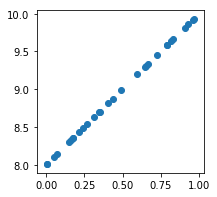

In [6]:
# This is a linear function and the scatterplot will be a line through the origin
plt.scatter(x,y)

In [7]:
# Calculate the SSE
def sse(y, y_pred):
    return ((y - y_pred) ** 2).sum()

# Assign the SSE to the loss function
def loss(y, a, b, x):
    return sse(y, lin(a, b, x))

# Average loss
def avg_loss(y, a, b, x):
    return np.sqrt(loss(y , a , b, x) / n)

In [9]:
# Initialize a and b with random weights (similar to NN)

a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

8.4658

In [10]:
# Provide the learning rate for the search for minima
# The smaller the learning rate, the slower the search will be
lr = 0.002

# Use Wolfram Alpha to determine the derivative of the loss function
# http://www.wolframalpha.com/calculators/derivative-calculator/

# Paste the left side of the equation
# dy/db = d[(y-(a*x+b))**2, b] = 2b + 2ax - 2y = 2(ax + b - y) = 2 * (y_pred - y)
# dy/da = d[(y-(a*x+b))**2, a] = x(2ax + 2b) - 2xy = 2x(ax + b - y) = x * dy/db

In [11]:
# Create the update function for the weights
# Change the weights by passing backward from the calculated loss function to the linear function used to make the prediction
def upd():
    global a_guess, b_guess

    # Update the predicted Y as we adjust the weights
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    
    # The update algorithm will change the weights using the learning rate and the derivatives
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [12]:
# Draw a scatter plot of the actual Y and show how Y_pred moves closer to actual while the weights are being udpated
fig = plt.figure(dpi = 100, figsize = (5, 4))
plt.scatter(x, y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(20): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval = 100)
ani